In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

In [2]:
num_images = 1
img_dim = 64 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 32
psf_stdev = 1.5
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

image 1 
count
 21 
total flux
 1287653.75 
loc
 [[52.162964  39.830418 ]
 [12.213307  45.293907 ]
 [63.082912  11.907054 ]
 [36.36726   56.756287 ]
 [60.25733    1.1723051]
 [58.065994  14.595041 ]
 [43.67334   48.98576  ]
 [38.669437  13.325005 ]
 [13.2819605 28.082819 ]
 [35.648968  48.139133 ]
 [ 8.273856  34.35229  ]
 [26.684076  57.230465 ]
 [ 1.811024   2.46129  ]
 [39.968826  23.313574 ]
 [19.464083  22.419538 ]
 [14.948098   7.399039 ]
 [ 5.157837   9.410208 ]
 [62.341183  59.580112 ]
 [ 6.77164   53.375393 ]
 [40.670963  44.86735  ]
 [40.032646  57.61583  ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]] 




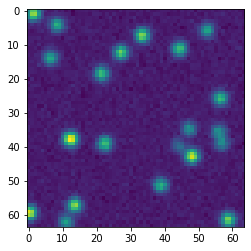

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")
    fig, img = plt.subplots(1,1)
    _ = img.imshow(images[i].cpu())

In [4]:
tile_side_length = 4

max_objects_smc = 2
pad = 2
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3., pad)
smc = SMCsampler(images[0], image_attributes, tile_side_length, prior, num_blocks = max_objects_smc+1, catalogs_per_block = 500, max_smc_iters = 500)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
# smc.summarize()

smc.counts.sum([0,1]).mean()

True count: 21
True total flux: 1287653.75

Starting the tile samplers...
iteration 5, temperature = 0.0003873245441354811
iteration 10, temperature = 0.0016868829261511564
iteration 15, temperature = 0.009638612158596516
iteration 20, temperature = 0.14773038029670715
iteration 25, temperature = 0.9325543642044067
iteration 30, temperature = 0.9978923201560974
Done!

Combining the results...
Done!

Pruning detections...
Done!



tensor(22.1212, device='cuda:0')